In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import mxnet as mx 
from data_ulti import toRecFile

In [2]:
def decodeBox(yolobox, size, dscale):
    i, j, x, y, w, h = yolobox
    cxt = i*dscale + x*dscale
    cyt = j*dscale + y*dscale
    wt = w*size
    ht = h*size
    return [cxt, cyt, wt, ht]

#7,7,5-> i,j,x,y,w,h

def bboxdraw(img, label, dscale=32):
    assert label.shape == (7,7,5)
    size = img.shape[0] # w or h could be [0] OR [1]
    ilist, jlist = np.where(label[:,:,0]==1) # the first element in 5[c, x, y, w, h] -> c flag 
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for i,j in zip(ilist, jlist): 
        cx,cy,w,h = label[i,j,1:] #get rid of the flag in label
        cxt, cyt, wt ,ht = decodeBox([i, j, cx,cy,w,h], size, dscale)
        # Create a Rectangle patch
        # (cxt-wt/2,cyt-ht/2) -> top left point
        rect = patches.Rectangle((cxt-wt/2,cyt-ht/2), wt,ht,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

In [3]:
imgroot = "./DATA/"
annotation = np.load("./DATA/annotation_list.npy")[()]
imglist = annotation.keys()
# sizet = 544
# rec_file = toRecFile(imgroot, imglist, annotation, sizet, (7,7,5), 32)

In [6]:
data = mx.io.ImageRecordIter(path_imgrec='./DATA_rec/cat_full.rec',
                             data_shape=(3,224,224),
                             label_width=7*7*5, 
                             batch_size=1,)

In [7]:
num= np.random.randint(0, len(imglist))
data.reset()
for i in range(num):
    batch = data.next()
print batch

DataBatch: data shapes: [(1L, 3L, 224L, 224L)] label shapes: [(1L, 245L)]


In [8]:
img = batch.data[0].asnumpy()[0]
label = batch.label[0].asnumpy().reshape((7,7,5))
label.shape

(7, 7, 5)

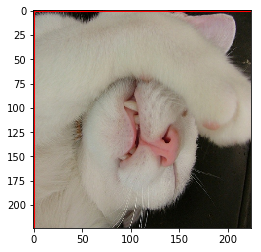

In [9]:
# (3, 224, 224) -> (224, 224, 3)
img4show = np.uint8(img.transpose((1,2,0)))
bboxdraw(img4show, label) 

In [10]:
fig,ax = plt.subplots(1)
ax.imshow(img4show)
ax